[Reference](https://blog.stackademic.com/the-simplex-method-in-linear-programming-a-practical-guide-e603cc345b37)

<ipython-input-1-c87dc86ed342>:27: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solution = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')


Optimal solution found:
x1 = 6.00, x2 = 2.00
Maximum objective value: 22.00


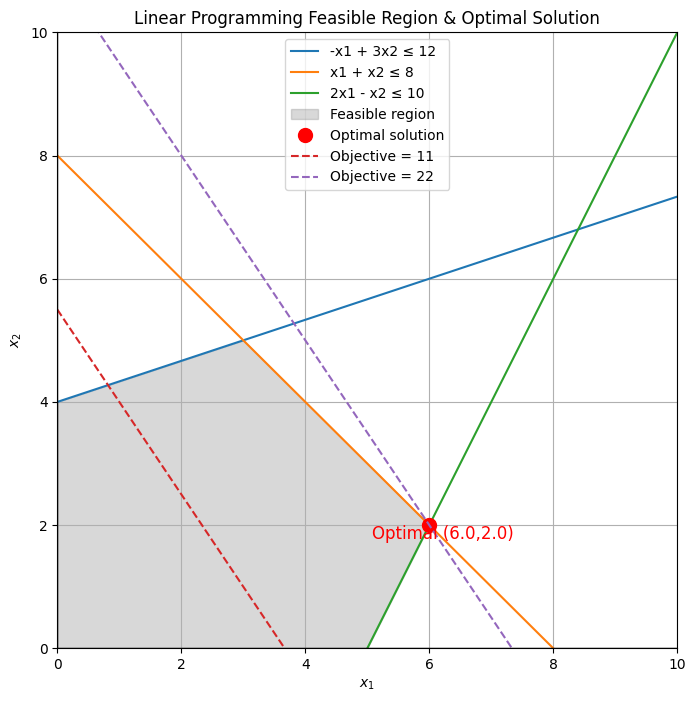

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# 1. Formulate the LP problem:
# Objective: Maximize 3*x1 + 2*x2
# We use linprog which solves minimization problems,
# thus we minimize -3*x1 - 2*x2 to achieve maximization.

c = [-3, -2]  # Coefficients for the objective function

# Constraints matrix (left-hand side):
A = [
    [-1, 3],   # -x1 + 3x2 ≤ 12
    [1, 1],    # x1 + x2 ≤ 8
    [2, -1]    # 2x1 - x2 ≤ 10
]

# Right-hand side vector:
b = [12, 8, 10]

# Bounds for x1 and x2 (non-negative constraints)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem (Simplex method implicitly)
solution = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')

# Display solution
if solution.success:
    optimal_x1, optimal_x2 = solution.x
    optimal_value = -solution.fun  # negate to return to maximization
    print("Optimal solution found:")
    print(f"x1 = {optimal_x1:.2f}, x2 = {optimal_x2:.2f}")
    print(f"Maximum objective value: {optimal_value:.2f}")
else:
    print("No feasible solution found (problem may be unbounded or infeasible).")

# 2. Check unboundedness explicitly (intuitive check)
if not solution.success and solution.status == 3:
    print("The problem is unbounded! (No finite optimal solution exists.)")

# 3. Visualization (Feasible Region and Optimal Solution):

# Create lines for the constraints:
x = np.linspace(0, 10, 400)

# Constraints lines
y1 = (12 + x) / 3  # from -x1 + 3x2 ≤ 12
y2 = 8 - x         # from x1 + x2 ≤ 8
y3 = 2*x - 10      # from 2x1 - x2 ≤ 10

plt.figure(figsize=(8, 8))
plt.plot(x, y1, label='-x1 + 3x2 ≤ 12')
plt.plot(x, y2, label='x1 + x2 ≤ 8')
plt.plot(x, y3, label='2x1 - x2 ≤ 10')

# Shade feasible region (roughly)
plt.fill_between(x, np.maximum.reduce([y3, np.zeros_like(x)]),
                    np.minimum(y1, y2),
                    where=(y1>=np.maximum(y3,0)) & (y2>=np.maximum(y3,0)),
                    color='gray', alpha=0.3, label='Feasible region')

# Plot optimal point
if solution.success:
    plt.plot(optimal_x1, optimal_x2, 'ro', markersize=10, label='Optimal solution')
    plt.annotate(f'Optimal ({optimal_x1:.1f},{optimal_x2:.1f})',
                 (optimal_x1, optimal_x2),
                 textcoords="offset points",
                 xytext=(10,-10), ha='center', fontsize=12, color='red')

# Objective function lines (level sets)
for z in [11, 22]:  # example level sets
    y_level = (z - 3*x) / 2
    plt.plot(x, y_level, linestyle='--', label=f'Objective = {z}')

# Set plot limits
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Linear Programming Feasible Region & Optimal Solution')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()